<a href="https://colab.research.google.com/github/erkansengonul/aiworkstr/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://datatofish.com/multiple-linear-regression-python/

Aşağıdaki örnekte, 2 bağımsız/girdi değişkeni kullanarak hayali bir ekonominin hisse senedi endeksi fiyatını/stock index price (yani bağımlı değişkeni) tahmin etmek için çoklu doğrusal regresyon kullanacağız:

*   Interest Rate
*   Unemployment Rate

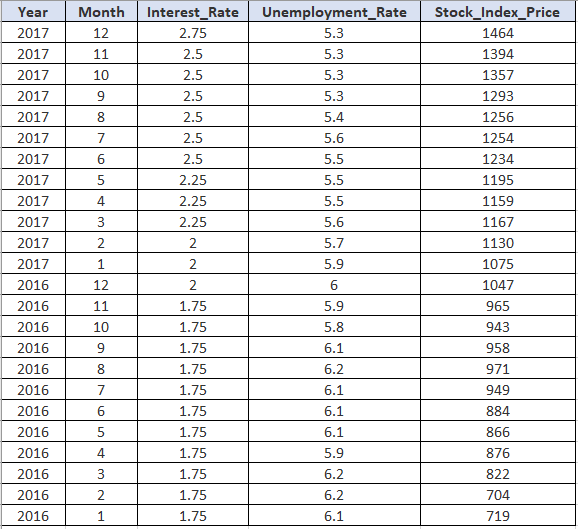

In [1]:
import pandas as pd

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 

print (df)

    Year  Month  Interest_Rate  Unemployment_Rate  Stock_Index_Price
0   2017     12           2.75                5.3               1464
1   2017     11           2.50                5.3               1394
2   2017     10           2.50                5.3               1357
3   2017      9           2.50                5.3               1293
4   2017      8           2.50                5.4               1256
5   2017      7           2.50                5.6               1254
6   2017      6           2.50                5.5               1234
7   2017      5           2.25                5.5               1195
8   2017      4           2.25                5.5               1159
9   2017      3           2.25                5.6               1167
10  2017      2           2.00                5.7               1130
11  2017      1           2.00                5.9               1075
12  2016     12           2.00                6.0               1047
13  2016     11           1.75    

**Doğrusallığı Kontrol Etme**

Doğrusal bir regresyon modeli yürütmeden önce, belirli varsayımların karşılandığını doğrulamanız önerilir.

Daha önce belirtildiği gibi, bağımlı değişken ile bağımsız değişken/değişkenler arasında doğrusal bir ilişki olup olmadığını kontrol etmek isteyebilirsiniz.

Örneğimizde, aşağıdakiler arasında doğrusal bir ilişki olup olmadığını kontrol etmek isteyebilirsiniz:

*   Stock_Index_Price (dependent variable) and Interest_Rate (independent variable)
*   Stock_Index_Price (dependent variable) and Unemployment_Rate (independent variable)

**Stock_Index_Price ve Interest_Rate Arası İlişki**

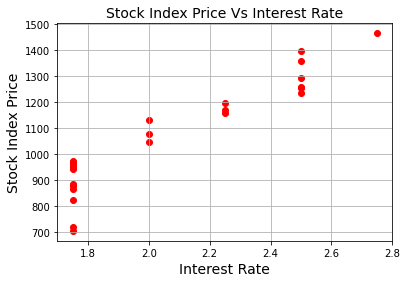

In [3]:
import matplotlib.pyplot as plt

plt.scatter(df['Interest_Rate'], df['Stock_Index_Price'], color='red')
plt.title('Stock Index Price Vs Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

**Stock_Index_Price ve Unemployment_Rate Arası İlişki**

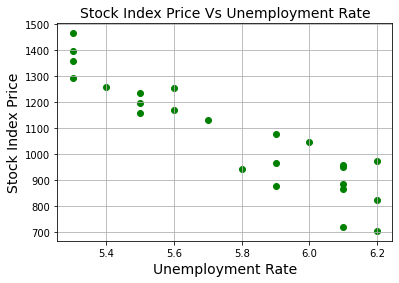

In [4]:
plt.scatter(df['Unemployment_Rate'], df['Stock_Index_Price'], color='green')
plt.title('Stock Index Price Vs Unemployment Rate', fontsize=14)
plt.xlabel('Unemployment Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

**Sonuç olarak;**

1.   Stock_Index_Price ve Interest_Rate arasında **pozitif** doğrusal ilişki var
2.   Stock_Index_Price ve Unemployment_Rate arasında **negatif** doğrusal ilişki var


In [14]:
from sklearn import linear_model

In [15]:
X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Stock_Index_Price']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 1798.4039776258546
Coefficients: 
 [ 345.54008701 -250.14657137]


**Multiple Linear Regression Denklemimiz:**

Stock_Index_Price = (**Intercept**) + (**Interest_Rate coef**)*X1 + (**Unemployment_Rate coef**)*X2

Stock_Index_Price = (1798.4040) + (345.5401)*X1 + (-250.1466)*X2

**Yeni bir değer tahmini yapalım:**

New_Interest_Rate = **2.75**

New_Unemployment_Rate = **5.3**

Stock_Index_Price = (1798.4040) + (345.5401)* **2.75** + (-250.1466)* **5.3**

In [16]:
# prediction with sklearn
New_Interest_Rate = 2.75
New_Unemployment_Rate = 5.3
print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))

Predicted Stock Index Price: 
 [1422.86238865]


In [11]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Tue, 20 Jul 2021   Prob (F-statistic):           4.04e-11
Time:                        16:45:56   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.24

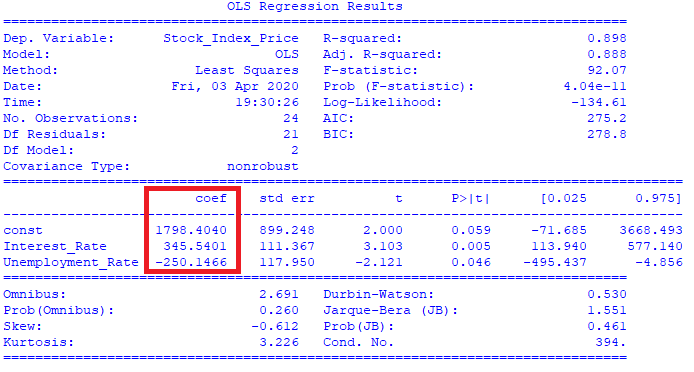